### Importa los datos
Dataset con diferentes fármacos, sus efectos y ratings de los clientes.

Importa el dataset *drugLibTrain_raw.tsv*

In [ ]:
'''El dataset cargado contiene las siguientes columnas:

Unnamed: 0: Índice
urlDrugName: Nombre del fármaco
rating: Calificación
effectiveness: Efectividad
sideEffects: Efectos secundarios
condition: Condición tratada
benefitsReview: Reseña de beneficios
sideEffectsReview: Reseña de efectos secundarios
commentsReview: Comentarios adicionales
Para los propósitos de este análisis, mantendremos las columnas numéricas y categóricas con menos de 10 categorías. Las columnas rating,
 effectiveness, sideEffects, y condition parecen ser las más relevantes.

Veamos cuántas categorías únicas tiene cada columna categórica: ​​

Las columnas categóricas tienen las siguientes cantidades de categorías únicas:

effectiveness: 5 categorías
sideEffects: 5 categorías
condition: 1426 categorías
Dado que la columna condition tiene demasiadas categorías, la descartaremos. Nos quedamos con las columnas rating, effectiveness, y 
sideEffects.

Ahora, transformaremos las columnas categóricas effectiveness y sideEffects a variables dummy. ​​

Realizaremos el clustering con el algoritmo K-means y evaluaremos la mejor cantidad de clusters (K) utilizando el silhouette_score. También
graficaremos el silhouette_score para diferentes valores de K.  ​​
'''

In [29]:
import pandas as pd 

data = pd.read_csv('C:/Users/rodri/OneDrive/Escritorio/DATA_SCIENCE/CODIGO_CLASES/TheBridge_DSPT_ML/No supervisado/Clustering/Practica/data/drugLibTrain_raw.tsv', sep='\t') 
data 

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above
...,...,...,...,...,...,...,...,...,...
3102,1039,vyvanse,10,Highly Effective,Mild Side Effects,adhd,"Increased focus, attention, productivity. Bett...","Restless legs at night, insomnia, headache (so...","I took adderall once as a child, and it made m..."
3103,3281,zoloft,1,Ineffective,Extremely Severe Side Effects,depression,Emotions were somewhat blunted. Less moodiness.,"Weight gain, extreme tiredness during the day,...",I was on Zoloft for about 2 years total. I am ...
3104,1664,climara,2,Marginally Effective,Moderate Side Effects,total hysterctomy,---,Constant issues with the patch not staying on....,---
3105,2621,trileptal,8,Considerably Effective,Mild Side Effects,epilepsy,Controlled complex partial seizures.,"Dizziness, fatigue, nausea",Started at 2 doses of 300 mg a day and worked ...


### Descriptive Analysis

Quedate únicamente con las columnas que podamos manejar: Columnas numéricas y columnas categóricas con pocas categorías (menos de 10)

In [30]:
# Inspeccionamos las primeras filas para tener una idea de las columnas 

data.dtypes 

Unnamed: 0            int64
urlDrugName          object
rating                int64
effectiveness        object
sideEffects          object
condition            object
benefitsReview       object
sideEffectsReview    object
commentsReview       object
dtype: object

In [31]:
# Inspeccionamos las primeras filas para tener una idea de las columnas
data.describe(include='all')

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
count,3107.000000,3107,3107.000000,3107,3107,3106,3089,3032,3095
unique,NaN,502,NaN,5,5,1426,3031,2813,3046
top,NaN,lexapro,NaN,Highly Effective,Mild Side Effects,depression,none,none,none
freq,NaN,63,NaN,1330,1019,236,20,112,6
mean,2080.607016,NaN,7.006115,NaN,NaN,NaN,NaN,NaN,NaN
std,1187.998828,NaN,2.937582,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,1062.500000,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,2092.000000,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,3092.500000,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# Verificación de la existencia de posibles datos faltantes 
print(data.info()) # SI HAY DATOS FALTANTES 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3107 entries, 0 to 3106
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         3107 non-null   int64 
 1   urlDrugName        3107 non-null   object
 2   rating             3107 non-null   int64 
 3   effectiveness      3107 non-null   object
 4   sideEffects        3107 non-null   object
 5   condition          3106 non-null   object
 6   benefitsReview     3089 non-null   object
 7   sideEffectsReview  3032 non-null   object
 8   commentsReview     3095 non-null   object
dtypes: int64(2), object(7)
memory usage: 218.6+ KB
None


In [33]:
# Filtramos las columnas numéricas y categóricas con menos de 10 categorías
numerical_cols = data.select_dtypes(include=['number']).columns
categorical_cols = [col for col in data.select_dtypes(include=['object']).columns if data[col].nunique() < 10] 
categorical_cols 

['effectiveness', 'sideEffects']

In [34]:
# LAS CATEGORIAS DE 'effectiveness' 
data['effectiveness'].unique()  

array(['Highly Effective', 'Marginally Effective', 'Ineffective',
       'Considerably Effective', 'Moderately Effective'], dtype=object)

In [35]:
# LAS CATEGORIAS DE 'sideEffects' 
data['sideEffects'].unique()  

array(['Mild Side Effects', 'Severe Side Effects', 'No Side Effects',
       'Extremely Severe Side Effects', 'Moderate Side Effects'],
      dtype=object)

#### Transforma las columnas categóricas

Transforma las columnas categoricas a numericas mediante dummies

In [36]:
pd.get_dummies(data['effectiveness']) 

,Considerably Effective,Highly Effective,Ineffective,Marginally Effective,Moderately Effective
0,False,True,False,False,False
1,False,True,False,False,False
2,False,True,False,False,False
3,False,False,False,True,False
4,False,False,False,True,False
...,...,...,...,...,...
3102,False,True,False,False,False
3103,False,False,True,False,False
3104,False,False,False,True,False
3105,True,False,False,False,False


In [37]:
# Convertir columnas categóricas en variables dummy

df_dummies_effectiveness = pd.get_dummies(data['effectiveness'], dtype='int')
df_dummies_effectiveness

,Considerably Effective,Highly Effective,Ineffective,Marginally Effective,Moderately Effective
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
3102,0,1,0,0,0
3103,0,0,1,0,0
3104,0,0,0,1,0
3105,1,0,0,0,0


In [38]:
# Convertir columnas categóricas en variables dummy

df_dummies_sideEffects = pd.get_dummies(data['sideEffects'], dtype='int')
df_dummies_sideEffects 

,Extremely Severe Side Effects,Mild Side Effects,Moderate Side Effects,No Side Effects,Severe Side Effects
0,0,1,0,0,0
1,0,0,0,0,1
2,0,0,0,1,0
3,0,1,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
3102,0,1,0,0,0
3103,1,0,0,0,0
3104,0,0,1,0,0
3105,0,1,0,0,0


In [39]:
# Concatenar las columnas dummy con la columna 'rating' 
X_with_rating = pd.concat([df_dummies_effectiveness, df_dummies_sideEffects, data['rating']], axis=1) 
X_with_rating

,Considerably Effective,Highly Effective,Ineffective,Marginally Effective,Moderately Effective,Extremely Severe Side Effects,Mild Side Effects,Moderate Side Effects,No Side Effects,Severe Side Effects,rating
0,0,1,0,0,0,0,1,0,0,0,4
1,0,1,0,0,0,0,0,0,0,1,1
2,0,1,0,0,0,0,0,0,1,0,10
3,0,0,0,1,0,0,1,0,0,0,3
4,0,0,0,1,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...
3102,0,1,0,0,0,0,1,0,0,0,10
3103,0,0,1,0,0,1,0,0,0,0,1
3104,0,0,0,1,0,0,0,1,0,0,2
3105,1,0,0,0,0,0,1,0,0,0,8


In [40]:
# Concatenar las columnas dummy sin la columna 'rating' 
X_without_rating = pd.concat([df_dummies_effectiveness, df_dummies_sideEffects], axis=1) # SE AVERIGUARÁ SI ES CAPAZ DE HACER LA MISMA AGRUPACIÓN 
                                                                          # SIN CONSIDERAR EL 'rating' DE LAS VARIABLES 
X_without_rating 

,Considerably Effective,Highly Effective,Ineffective,Marginally Effective,Moderately Effective,Extremely Severe Side Effects,Mild Side Effects,Moderate Side Effects,No Side Effects,Severe Side Effects
0,0,1,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
3102,0,1,0,0,0,0,1,0,0,0
3103,0,0,1,0,0,1,0,0,0,0
3104,0,0,0,1,0,0,0,1,0,0
3105,1,0,0,0,0,0,1,0,0,0


In [42]:
# Eliminar duplicados
X_without_rating = X_without_rating.drop_duplicates() 

#### Evalua cual es la mejor K

Utiliza silhouette_score para evaluar cual es la mejor K. 

In [47]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import seaborn as sns 

In [48]:
# Determinar el número de muestras únicas
n_samples = X_without_rating.shape[0] 
n_samples 

25

In [49]:
# Evaluar silhouette_score para determinar la mejor K
rand_state = 42
models = [] 
inertias = []

In [55]:
# Ajustar el rango de k al número de muestras únicas 

for k in range(2, min(n_samples, 100) + 1): # max k should be n_samples or 100, whichever is smaller  
    km = KMeans(n_clusters=k, random_state=rand_state) 
    km.fit(X_without_rating) 
    models.append(km) 
    inertias.append(km.inertia_)

In [56]:
# Verificar tamaños
print(f"Tamaño de range(2, {min(n_samples, 100) + 1}): {len(range(2, min(n_samples, 100) + 1))}")
print(f"Tamaño de inertias: {len(inertias)}") 

Tamaño de range(2, 26): 24
Tamaño de inertias: 96


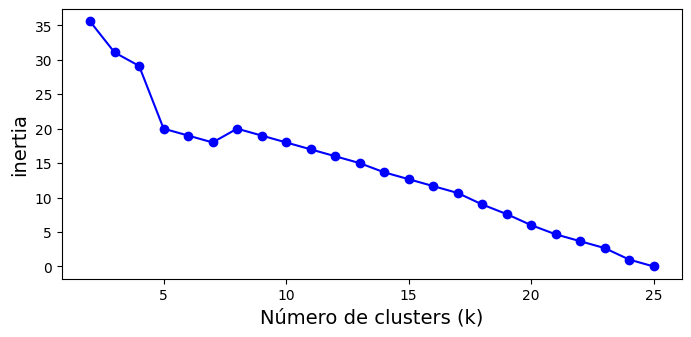

In [62]:
# Graficar inertias

import matplotlib.pyplot as plt 

plt.figure(figsize=(8, 3.5))
plt.plot(range(2, len(inertias) + 2), inertias, "bo-") 
plt.xlabel("Número de clusters (k)", fontsize=14)
plt.ylabel("inertia", fontsize=14) 
plt.show()  

In [65]:
# Calcular silhouette scores
silhouette_score_list = []

for model in models:
    if model.n_clusters < n_samples:  # Ensure number of clusters is valid for silhouette_score
        score = silhouette_score(X_without_rating, model.labels_)
        silhouette_score_list.append(score) 

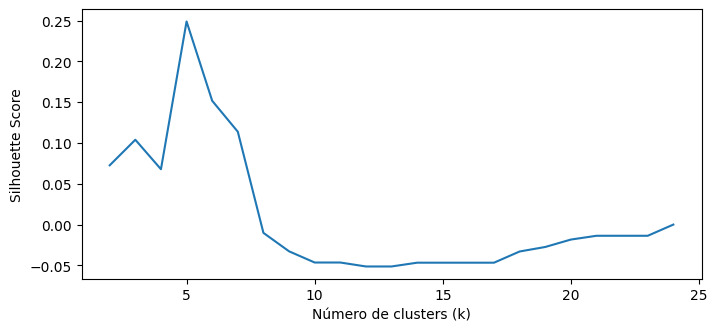

In [66]:
# Graficar silhouette scores 

plt.figure(figsize=(8, 3.5))
plt.plot(range(2, len(silhouette_score_list) + 2), silhouette_score_list)
plt.xlabel("Número de clusters (k)")
plt.ylabel("Silhouette Score")
plt.show() 

In [67]:
silhouette_score_list = [silhouette_score(X, model.labels_) for model in models] 
silhouette_score_list # ES LA INVERSA DE LA CURVA DE ARRIBA 

[0.17394049962258318,
 0.1409296107984225,
 0.16661582461827187,
 0.19506151006454786,
 0.19080082247103888,
 0.2519337016307118,
 0.14666993960024846,
 0.2798437285140696,
 0.31547078403842577,
 0.1839917857860395,
 0.24595717352377924,
 0.15538173746949446,
 0.15764435567285406,
 0.15847492639789323,
 0.17877282673981176,
 0.10440914949470753,
 0.05903141411860253,
 0.07744769291297479,
 0.07805619344254203,
 -0.02844457980962396,
 -0.014995224783223685,
 -0.007516092488690196,
 -0.0009699058240799889,
 0.015335571450492958,
 0.02250816819573696,
 -0.03711101783171752,
 -0.04945445307423913,
 -0.04143270038737525,
 0.0019889621834037565,
 0.030888152641314278,
 0.026781300907949973,
 0.019459301111076886,
 0.026699328190184245,
 -0.13313680447569612,
 -0.13603751718537252,
 -0.2276462647463958,
 -0.22826016016121548,
 -0.22822800293623224,
 -0.23716191395432937,
 -0.2400011027225938,
 -0.2355845916557853,
 -0.232606009421943,
 -0.2325150384024159,
 -0.2547578495667072,
 -0.2563703517

In [76]:
# Entrenar el modelo K-means con el mejor K y análisis de resultados
best_k = silhouette_score_list.index(max(silhouette_score_list)) + 2
km = KMeans(n_clusters=best_k, random_state=rand_state) # SE ENTRENA EL SIGUIENTE MODELO 
km.fit(X_without_rating) 

df_cluster = X_without_rating.copy() # SE LE AGREGÓ EL CLUSTER AL QUE PERTENECEN 
df_cluster["clusters"] = km.labels_ 

km, df_cluster 

(KMeans(n_clusters=5, random_state=42),
      Considerably Effective  Highly Effective  Ineffective  \
 0                         0                 1            0   
 1                         0                 1            0   
 2                         0                 1            0   
 3                         0                 0            0   
 4                         0                 0            0   
 5                         0                 0            1   
 7                         1                 0            0   
 9                         0                 0            1   
 10                        1                 0            0   
 11                        0                 1            0   
 12                        1                 0            0   
 14                        1                 0            0   
 16                        0                 0            0   
 23                        0                 0            0   
 32            

In [77]:
# Cantidad de elementos por cluster 
df_cluster["clusters"].groupby("clusters").describe() # CUANTOS REGISTROS PERTENECEN A CADA CLUSTER 

KeyError: 'clusters'

<Axes: ylabel='count'>

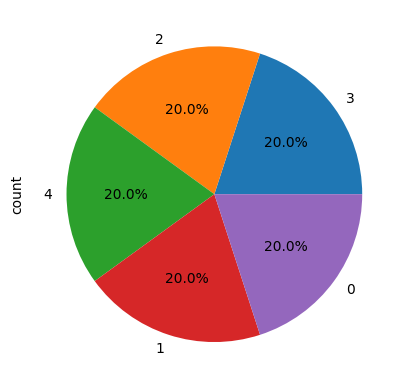

In [72]:
df_cluster["clusters"].value_counts().plot.pie(autopct="%.1f%%")

In [28]:
'''se quiere entender cómo el algoritmo K-means clasificó los datos en clusters usando un árbol de decisión. Además, se hace un análisis de las características más importantes 
según el árbol de decisión.'''

'se quiere entender cómo el algoritmo K-means clasificó los datos en clusters usando un árbol de decisión. Además, se hace un análisis de las características más importantes \nsegún el árbol de decisión.'

In [78]:
# DESCRIPCIÓN DE LOS CLUSTERS 

df_cluster.groupby("clusters").describe()

Considerably Effective                                          \
                          count mean       std  min  25%  50%  75%  max   
clusters                                                                  
0                           5.0  0.2  0.447214  0.0  0.0  0.0  0.0  1.0   
1                           5.0  0.2  0.447214  0.0  0.0  0.0  0.0  1.0   
2                           5.0  0.2  0.447214  0.0  0.0  0.0  0.0  1.0   
3                           5.0  0.2  0.447214  0.0  0.0  0.0  0.0  1.0   
4                           5.0  0.2  0.447214  0.0  0.0  0.0  0.0  1.0   

         Highly Effective       ... No Side Effects      Severe Side Effects  \
                    count mean  ...             75%  max               count   
clusters                        ...                                            
0                     5.0  0.2  ...             0.0  0.0                 5.0   
1                     5.0  0.2  ...             0.0  0.0                 5.0   
2                     5.0  0.2  ...             0.0  0.0                 5.0   
3                     5.0  0.2  ...             0.0  0.0                 5.0   
4                     5.0  0.2  ...             1.0  1.0                 5.0   

                                             
         mean  std  min  25%  50%  75%  max  
clusters                                     
0         0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1         0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2         1.0  0.0  1.0  1.0  1.0  1.0  1.0  
3         0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4         0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 80 columns]

In [79]:
# Análisis de los centros de los clusters
cluster_centers = pd.DataFrame(np.round(km.cluster_centers_, 2), columns=X_without_rating.columns)
print(cluster_centers)

   Considerably Effective  Highly Effective  Ineffective  \
0                     0.2               0.2          0.2   
1                     0.2               0.2          0.2   
2                     0.2               0.2          0.2   
3                     0.2               0.2          0.2   
4                     0.2               0.2          0.2   

   Marginally Effective  Moderately Effective  Extremely Severe Side Effects  \
0                   0.2                   0.2                            0.0   
1                   0.2                   0.2                            1.0   
2                   0.2                   0.2                            0.0   
3                   0.2                   0.2                            0.0   
4                   0.2                   0.2                            0.0   

   Mild Side Effects  Moderate Side Effects  No Side Effects  \
0                0.0                    1.0              0.0   
1                0.0          

In [80]:
# UTILIZAR UN ÁRBOL DE DECISIÓN PARA ENTENDER LOS CLUSTERS  

from sklearn.tree import DecisionTreeClassifier # PARA INTENTAR ENTENDER COMO EL ALGORITMO NO SUPERVISADO CLASIFICO LOS DATOS EN
#CLUSTERS, SE REALIZA LO SIGUIENTE: 
# -SE COGEN LOS DATOS SIN LOS CLUSTERS, LOS CLUSTERS SOLAMENTE SE TOMAN COMO ETIQUETAS. 
# - MEDIANTE UN MODELO EXPLICATIVO COMPUESTO POR ARBOLES DE DESICIÓN 


# Preparar los datos para el árbol de decisión 
X_tree = df_cluster.drop(columns="clusters")
y_tree = df_cluster["clusters"] 

# Entrenar el árbol de decisión 
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X_tree, y_tree) 

DecisionTreeClassifier(max_depth=4)

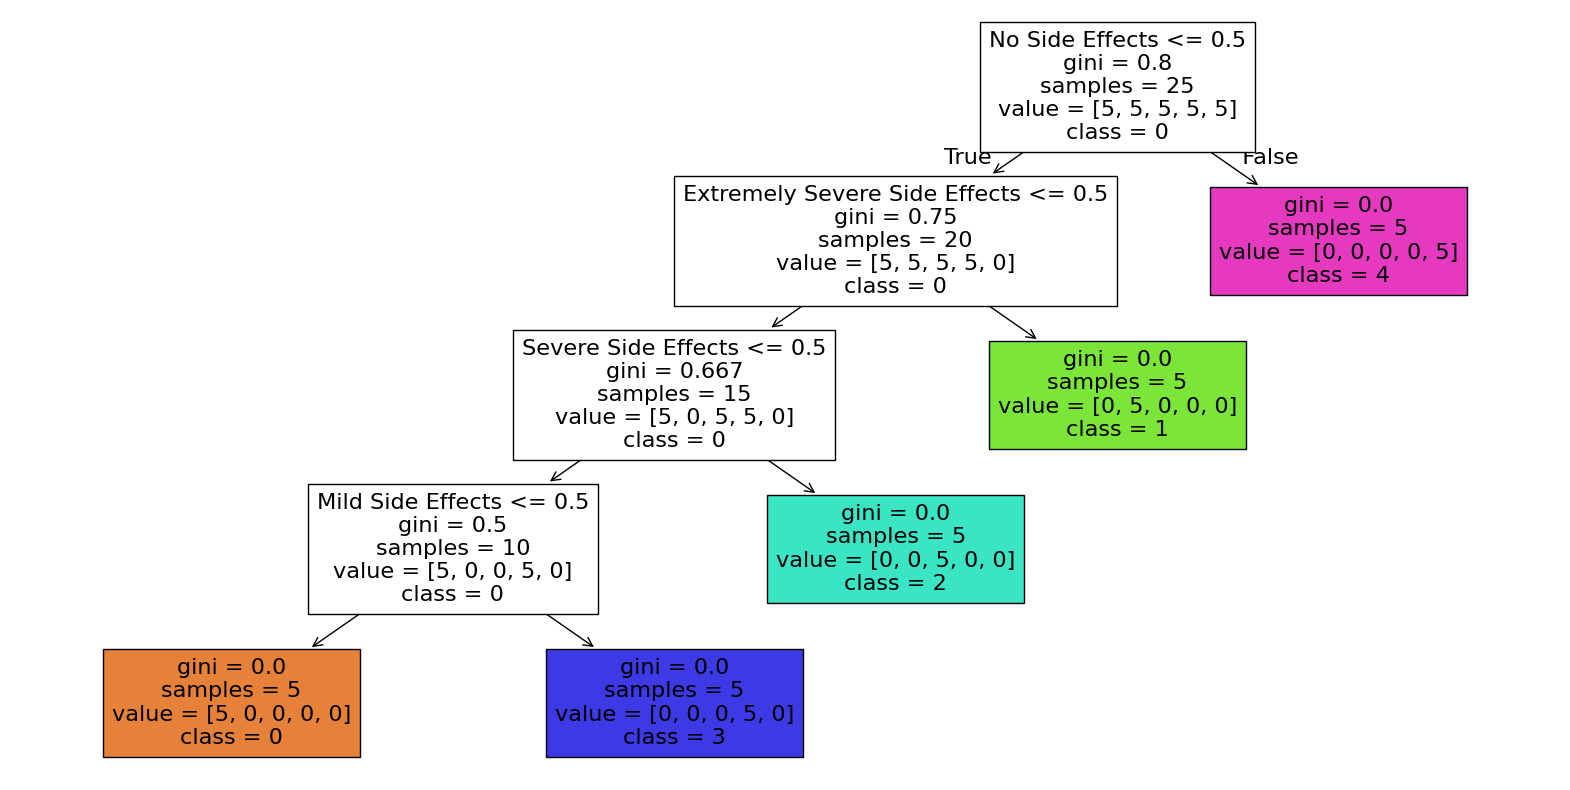

In [81]:
# Visualización del árbol de decisión 
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X_tree.columns, class_names=[str(i) for i in range(best_k)], filled=True)
plt.show() 

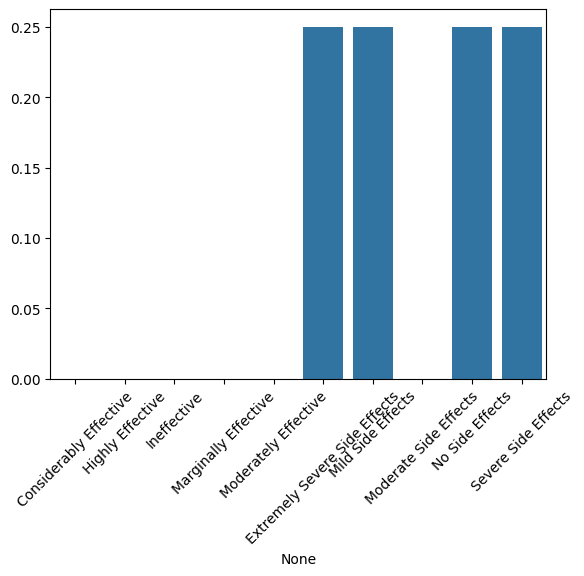

In [82]:
# Análisis de la importacia de las características 

sns.barplot(x=X_tree.columns, y=clf.feature_importances_)
plt.xticks(rotation=45)
plt.show() 

In [ ]:
# EL RESULTADO QUE DEVUELVE EL GRÁFICO SEÑALA QUE EL MODELO NO SUPERVISADO HA TOMADO DECISIONES DE AGRUPAMIENTO EN UN 90% DE 
# LAS VECES BASADO EN EL RATING DE LOS VALORES, Y EN UN 10% DE LAS OCASIONES LA DECISIÓN DE AGRUPAMIENTO LA TOMÓ EN BASE A LA
# VARIABLE 'considerably Effective'  

# EN UN SEGUNDO CASO, AL QUITAR LA VARIABLE 'rating' EL MODELO CONSIDERA PARA AGRUPAR LOS DATOS LAS VARIABLES 'Considerabley Effective',
# 'Highly Effective', 'Moderately Effective', 'Mild Side Effects', 'Moderate Side Effects' Y 'No Side Effects' 

## ERROR, SOLAMENTE CONSIDERÓ 25 ELEMENTOS, AVERIGUAR EL PORQUE NO CONSIDERÓ TODOS LOS ELEMENTOS 

In [22]:
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score 

rand_state = 42 

models = [] 

for k in range(2, 100): 
    km = KMeans(n_clusters=k, random_state=rand_state) 
    km.fit(X) 
    models.append(km) 

NameError: name 'X' is not defined

In [18]:
# Identificar el mejor número de clusters (K)
best_k = range_n_clusters[silhouette_avg.index(max(silhouette_avg))]
print(f"La mejor K es: {best_k}")

La mejor K es: 2


In [20]:
# Entrenar el modelo KMeans con la mejor K
kmeans = KMeans(n_clusters=best_k)
kmeans.fit(data_encoded)
data_encoded['cluster'] = kmeans.labels_ 
data_encoded['cluster'] 

0       0
1       0
2       1
3       0
4       1
       ..
3102    1
3103    0
3104    1
3105    0
3106    0
Name: cluster, Length: 3107, dtype: int32

#### Genera el K Means 

Comprueba los resultados y muestra en un pie plot la distribución de los distintos clusters.

In [23]:
cluster_counts = data_encoded['cluster'].value_counts() 
cluster_counts 

cluster
0    1574
1    1533
Name: count, dtype: int64

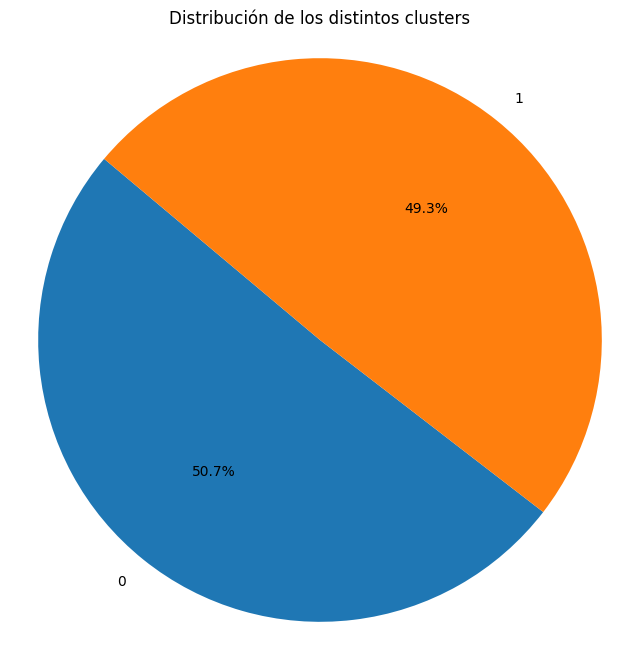

In [22]:
plt.figure(figsize=(8, 8))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de los distintos clusters')
plt.axis('equal')
plt.show() 

In [8]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt 

# Cargar el dataset
file_path = ('C:/Users/rodri/OneDrive/Escritorio/DATA_SCIENCE/CODIGO_CLASES/TheBridge_DSPT_ML/No supervisado/Clustering/Practica/data/drugLibTrain_raw.tsv')
df = pd.read_csv(file_path, sep='\t')

In [9]:
# Mostrar las primeras filas del dataframe
print(df.head())

   Unnamed: 0       urlDrugName  rating         effectiveness  \
0        2202         enalapril       4      Highly Effective   
1        3117  ortho-tri-cyclen       1      Highly Effective   
2        1146           ponstel      10      Highly Effective   
3        3947          prilosec       3  Marginally Effective   
4        1951            lyrica       2  Marginally Effective   

           sideEffects                               condition  \
0    Mild Side Effects  management of congestive heart failure   
1  Severe Side Effects                        birth prevention   
2      No Side Effects                        menstrual cramps   
3    Mild Side Effects                             acid reflux   
4  Severe Side Effects                            fibromyalgia   

                                      benefitsReview  \
0  slowed the progression of left ventricular dys...   
1  Although this type of birth control has more c...   
2  I was used to having cramps so badly that

In [10]:
# Examinar las columnas y sus valores únicos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3107 entries, 0 to 3106
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         3107 non-null   int64 
 1   urlDrugName        3107 non-null   object
 2   rating             3107 non-null   int64 
 3   effectiveness      3107 non-null   object
 4   sideEffects        3107 non-null   object
 5   condition          3106 non-null   object
 6   benefitsReview     3089 non-null   object
 7   sideEffectsReview  3032 non-null   object
 8   commentsReview     3095 non-null   object
dtypes: int64(2), object(7)
memory usage: 218.6+ KB


In [11]:
# Contar los valores únicos en cada columna categórica
categorical_columns = ['urlDrugName', 'effectiveness', 'sideEffects', 'condition']
unique_values = {col: df[col].nunique() for col in categorical_columns}
print(unique_values) 

{'urlDrugName': 502, 'effectiveness': 5, 'sideEffects': 5, 'condition': 1426}


In [12]:
# Seleccionar columnas relevantes
df_relevant = df[['rating', 'effectiveness', 'sideEffects']]

In [13]:
# Convertir columnas categóricas en variables dummy
df_dummies = pd.get_dummies(df_relevant, columns=['effectiveness', 'sideEffects'])

In [14]:
# Mostrar las primeras filas del dataframe transformado
print(df_dummies.head())


   rating  effectiveness_Considerably Effective  \
0       4                                 False   
1       1                                 False   
2      10                                 False   
3       3                                 False   
4       2                                 False   

   effectiveness_Highly Effective  effectiveness_Ineffective  \
0                            True                      False   
1                            True                      False   
2                            True                      False   
3                           False                      False   
4                           False                      False   

   effectiveness_Marginally Effective  effectiveness_Moderately Effective  \
0                               False                               False   
1                               False                               False   
2                               False                               False   


In [20]:
# Dataframe transformado
df_dummies = pd.get_dummies(df_relevant, columns=['effectiveness', 'sideEffects'])
df_dummies

,rating,effectiveness_Considerably Effective,effectiveness_Highly Effective,effectiveness_Ineffective,effectiveness_Marginally Effective,effectiveness_Moderately Effective,sideEffects_Extremely Severe Side Effects,sideEffects_Mild Side Effects,sideEffects_Moderate Side Effects,sideEffects_No Side Effects,sideEffects_Severe Side Effects
0,4,False,True,False,False,False,False,True,False,False,False
1,1,False,True,False,False,False,False,False,False,False,True
2,10,False,True,False,False,False,False,False,False,True,False
3,3,False,False,False,True,False,False,True,False,False,False
4,2,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
3102,10,False,True,False,False,False,False,True,False,False,False
3103,1,False,False,True,False,False,True,False,False,False,False
3104,2,False,False,False,True,False,False,False,True,False,False
3105,8,True,False,False,False,False,False,True,False,False,False


In [24]:
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score 

rand_state = 42 

models = [] 

for k in range(2, 100): 
    km = KMeans(n_clusters=k, random_state=rand_state) 
    km.fit(df_dummies) 
    models.append(km) 

In [26]:
km

KMeans(n_clusters=99, random_state=42)

In [21]:
# Definir el rango de K a evaluar
range_n_clusters = list(range(2, 11))
range_n_clusters 

[2, 3, 4, 5, 6, 7, 8, 9, 10]

In [17]:
# Lista para almacenar los valores de silhouette_score para cada K
silhouette_avg_scores = []

In [18]:
# Evaluar silhouette_score para cada K
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(df_dummies)
    
    silhouette_avg = silhouette_score(df_dummies, cluster_labels)
    silhouette_avg_scores.append(silhouette_avg)
    print(f"Para n_clusters = {n_clusters}, el silhouette score promedio es de {silhouette_avg}") 

c:\Users\rodri\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\rodri\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Para n_clusters = 2, el silhouette score promedio es de 0.6055089618561077
Para n_clusters = 3, el silhouette score promedio es de 0.45301977160140894
Para n_clusters = 4, el silhouette score promedio es de 0.39817528676924296
Para n_clusters = 5, el silhouette score promedio es de 0.3777149532566565
Para n_clusters = 6, el silhouette score promedio es de 0.35456362618162285
Para n_clusters = 7, el silhouette score promedio es de 0.3772000181524037
Para n_clusters = 8, el silhouette score promedio es de 0.39779536617934874
Para n_clusters = 9, el silhouette score promedio es de 0.42030427393796976
Para n_clusters = 10, el silhouette score promedio es de 0.4475052271862354


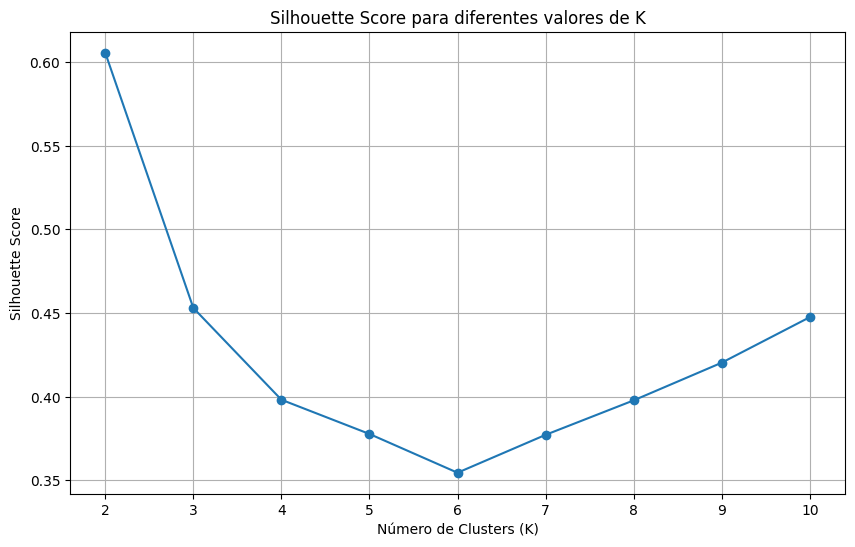

In [19]:
# Graficar silhouette scores para diferentes valores de K
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_avg_scores, marker='o')
plt.title('Silhouette Score para diferentes valores de K')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show() 

Tamaño de range(2, 26): 24
Tamaño de inertias: 24


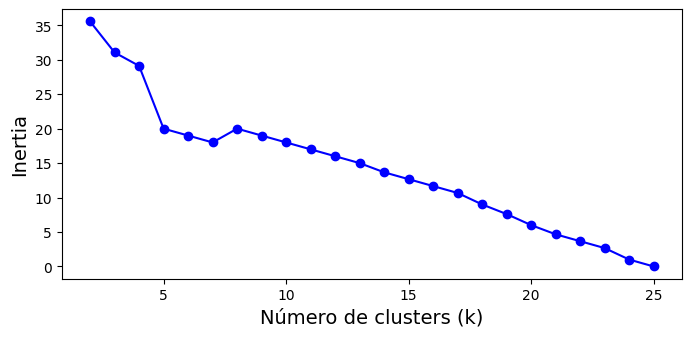

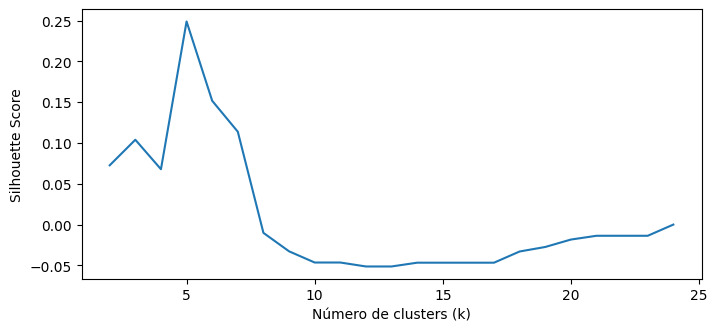

         Considerably Effective                                          \
                          count mean       std  min  25%  50%  75%  max   
clusters                                                                  
0                           5.0  0.2  0.447214  0.0  0.0  0.0  0.0  1.0   
1                           5.0  0.2  0.447214  0.0  0.0  0.0  0.0  1.0   
2                           5.0  0.2  0.447214  0.0  0.0  0.0  0.0  1.0   
3                           5.0  0.2  0.447214  0.0  0.0  0.0  0.0  1.0   
4                           5.0  0.2  0.447214  0.0  0.0  0.0  0.0  1.0   

         Highly Effective       ... No Side Effects      Severe Side Effects  \
                    count mean  ...             75%  max               count   
clusters                        ...                                            
0                     5.0  0.2  ...             0.0  0.0                 5.0   
1                     5.0  0.2  ...             0.0  0.0                 5.0   

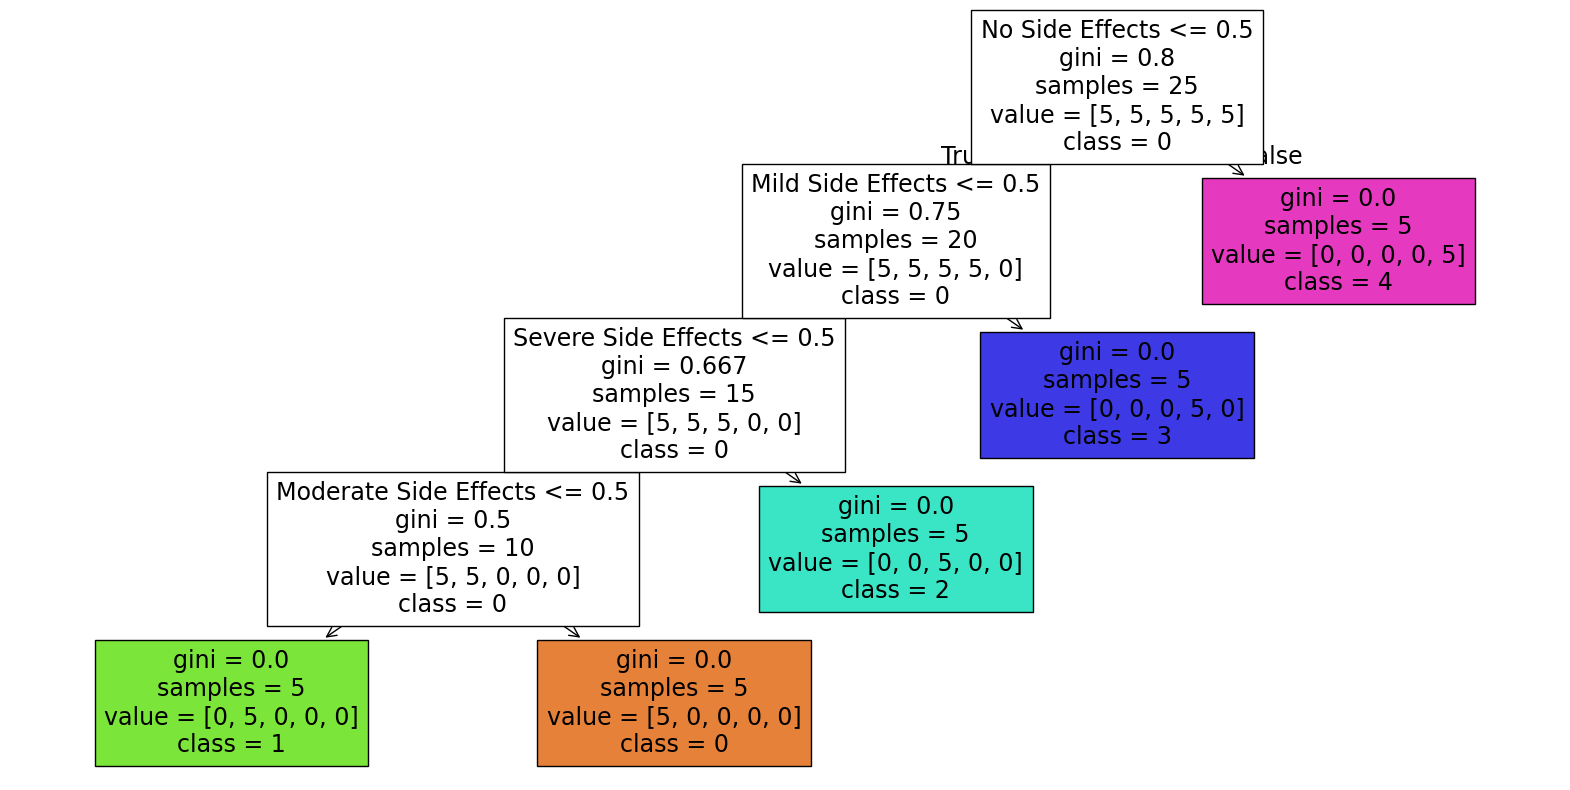

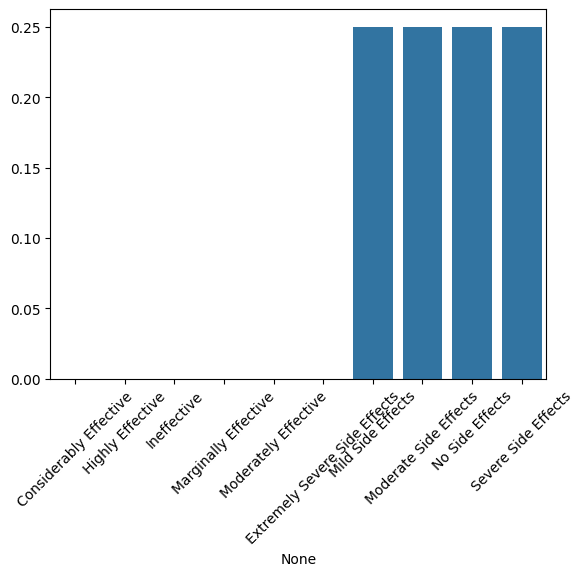

In [61]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 1: Cargar el dataset
file_path = 'C:/Users/rodri/OneDrive/Escritorio/DATA_SCIENCE/CODIGO_CLASES/TheBridge_DSPT_ML/No supervisado/Clustering/Practica/data/drugLibTrain_raw.tsv'
data = pd.read_csv(file_path, sep='\t')

# Paso 2: Seleccionar columnas relevantes
numerical_cols = data.select_dtypes(include=['number']).columns
categorical_cols = [col for col in data.select_dtypes(include=['object']).columns if data[col].nunique() < 10]

# Paso 3: Transformar columnas categóricas a numéricas
df_dummies_effectiveness = pd.get_dummies(data['effectiveness'], dtype='int')
df_dummies_sideEffects = pd.get_dummies(data['sideEffects'], dtype='int')
X_with_rating = pd.concat([df_dummies_effectiveness, df_dummies_sideEffects, data['rating']], axis=1)
X_without_rating = pd.concat([df_dummies_effectiveness, df_dummies_sideEffects], axis=1)

# Eliminar duplicados
X_without_rating = X_without_rating.drop_duplicates()

# Determinar el número de muestras únicas
n_samples = X_without_rating.shape[0]

# Paso 4: Evaluar silhouette_score para determinar la mejor K
rand_state = 42
models = []
inertias = []

# Ajustar el rango de k al número de muestras únicas
for k in range(2, min(n_samples, 100) + 1):  # max k should be n_samples or 100, whichever is smaller
    km = KMeans(n_clusters=k, random_state=rand_state)
    km.fit(X_without_rating)
    models.append(km)
    inertias.append(km.inertia_)

# Verificar tamaños
print(f"Tamaño de range(2, {min(n_samples, 100) + 1}): {len(range(2, min(n_samples, 100) + 1))}")
print(f"Tamaño de inertias: {len(inertias)}")

# Graficar inertias
plt.figure(figsize=(8, 3.5))
plt.plot(range(2, len(inertias) + 2), inertias, "bo-")
plt.xlabel("Número de clusters (k)", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.show()

# Calcular y graficar silhouette scores
silhouette_score_list = []

for model in models:
    if model.n_clusters < n_samples:  # Ensure number of clusters is valid for silhouette_score
        score = silhouette_score(X_without_rating, model.labels_)
        silhouette_score_list.append(score)

plt.figure(figsize=(8, 3.5))
plt.plot(range(2, len(silhouette_score_list) + 2), silhouette_score_list)
plt.xlabel("Número de clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()

# Paso 5: Entrenar el modelo K-means con el mejor K y análisis de resultados
best_k = silhouette_score_list.index(max(silhouette_score_list)) + 2
km = KMeans(n_clusters=best_k, random_state=rand_state)
km.fit(X_without_rating)

df_cluster = X_without_rating.copy()
df_cluster["clusters"] = km.labels_

# Paso 6: Descripción de los clusters
print(df_cluster.groupby("clusters").describe())

# Paso 7: Análisis de los centros de los clusters
cluster_centers = pd.DataFrame(np.round(km.cluster_centers_, 2), columns=X_without_rating.columns)
print(cluster_centers)

# Paso 8: Utilizar un árbol de decisión para entender los clusters
X_tree = df_cluster.drop(columns="clusters")
y_tree = df_cluster["clusters"]

clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X_tree, y_tree)

# Paso 9: Visualización del árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X_tree.columns, class_names=[str(i) for i in range(best_k)], filled=True)
plt.show()

# Paso 10: Análisis de la importancia de las características
sns.barplot(x=X_tree.columns, y=clf.feature_importances_)
plt.xticks(rotation=45)
plt.show()
